<a href="https://colab.research.google.com/github/zainsuch19/entropy-neural-network/blob/main/entropy_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an
an input signal, my network will output a single representing its shannons entropy'''

'Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an\nan input signal, my network will output a single representing its shannons entropy'

In [ ]:
'''We will generate synthetic data that represents signal segments and their
corresponding shannon entropy
H(X) = -sum(p(x)log(p(x)))
'''

'We will generate synthetic data that represents signal segments and their\ncorresponding shannon entropy\nH(X) = -sum(p(x)log(p(x)))\n'

In [ ]:
import numpy as np

def generate_synthetic_data(num_samples=10000, num_bins=10):
    X = np.random.rand(num_samples, 100)  # Generate random input data
    y = []

    for sample in X:
        hist, _ = np.histogram(sample, bins=num_bins, range=(0, 1), density=True)
        hist += 1e-9  # Prevent log(0)
        entropy = -np.sum(hist * np.log(hist))
        y.append(entropy)

    y = np.array(y).reshape(-1, 1)
    return X, y

# Example of generating data
X, y = generate_synthetic_data()
print(X.shape, y.shape)  # Should output (10000, 100), (10000, 1)


(10000, 100) (10000, 1)


In [ ]:
#Implementing several dense layers with ReLU(Rectified Linear Unit)

import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape=(100,)):
    model = models.Sequential()

    # Add input layer (Flatten the input)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model

# Build the model
model = build_model()
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,297 (91.00 KB)

 Trainable params: 23,297 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''Now choosing a loss function. For this task mean squared error is a good choice'''
#Training the model
# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Model Loss: {loss}, Mean Absolute Error: {mae}")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0572 - mae: 0.1867 - val_loss: 0.0485 - val_mae: 0.1760
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0503 - mae: 0.1746 - val_loss: 0.0485 - val_mae: 0.1722
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0499 - mae: 0.1743 - val_loss: 0.0484 - val_mae: 0.1770
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0483 - mae: 0.1711 - val_loss: 0.0486 - val_mae: 0.1778
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0478 - mae: 0.1715 - val_loss: 0.0488 - val_mae: 0.1730
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0486 - mae: 0.1734 - val_loss: 0.0493 - val_mae: 0.1722
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0497 - mae: 0.1738 - val_loss: 0.0501 - val_mae: 0.1741
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0471 - mae: 0.1710 - val_loss: 0.0493 - val_mae: 0.1733
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


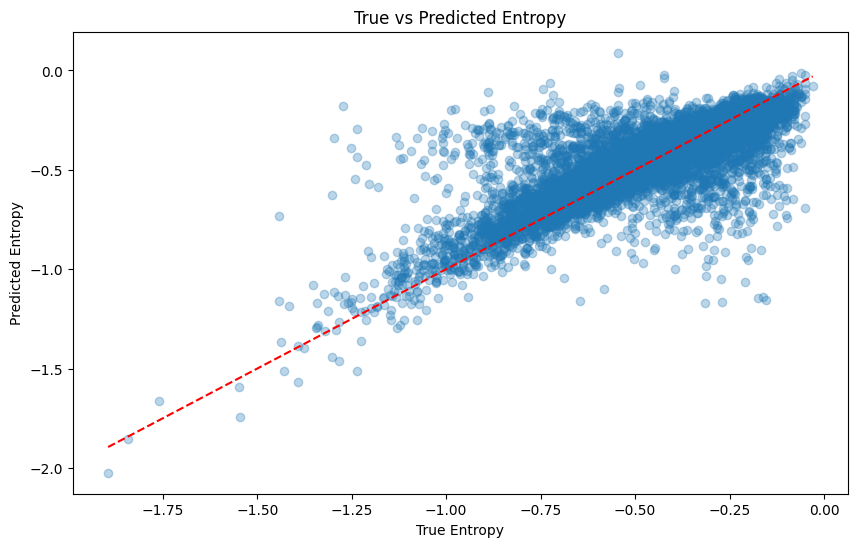

In [ ]:
import matplotlib.pyplot as plt

# Predict entropy for the test data
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of equality
plt.xlabel("True Entropy")
plt.ylabel("Predicted Entropy")
plt.title("True vs Predicted Entropy")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your input features and target variable
# X: features (input variables)
# y: target (output variable, i.e., Shannon's entropy)

# Step 1: Split the data into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2 of the original data set, resulting in 60/20/20 split

# Step 3: Normalize the features (very important for neural networks)
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7657 - mae: 0.6216 - val_loss: 0.2025 - val_mae: 0.2329
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2794 - mae: 0.3175 - val_loss: 0.1782 - val_mae: 0.2011
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2126 - mae: 0.2514 - val_loss: 0.1633 - val_mae: 0.1845
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1824 - mae: 0.2203 - val_loss: 0.1526 - val_mae: 0.1756
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1597 - mae: 0.1937 - val_loss: 0.1451 - val_mae: 0.1718
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1524 - mae: 0.1912 - val_loss: 0.1385 - val_mae: 0.1699
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1456 - mae: 0.1885 - val_loss: 0.1334 - val_mae: 0.1691
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1362 - mae: 0.1790 - val_loss: 0.1263 - val_mae: 0.1689
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1296 - mae: 0.1796 - va

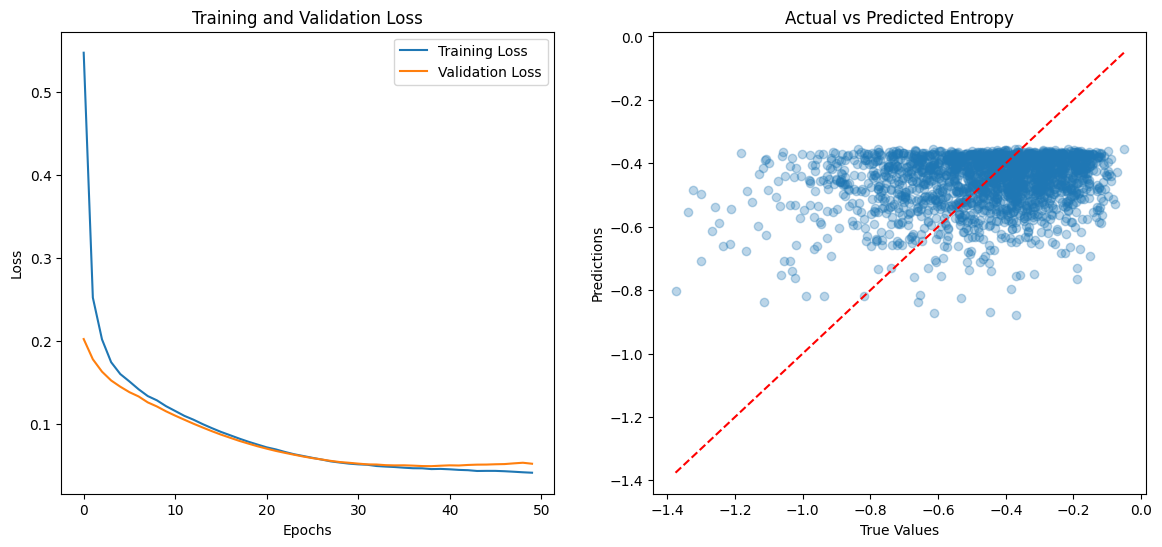

Mean Absolute Error: 0.17295960466247967


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=64,
                    verbose=1)

# Predict entropy for the test data
y_pred = model.predict(X_test)

# Plot the training and validation loss
plt.figure(figsize=(14, 6))

# Training and Validation Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted Entropy')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model(input_shape=(100,)):
    model = models.Sequential()

    # Add input layer (Flatten the input)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers with increased complexity
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())  # Add Batch Normalization
    model.add(layers.Dropout(0.3))  # Increased dropout for regularization

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    model.add(layers.Dense(64, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model with a lower learning rate
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                  loss='mean_squared_error', metrics=['mae'])

    return model

# Build the model
model = build_model()

# Summary of the model
model.summary()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Training the model with new callbacks
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Model Loss: {loss}, Mean Absolute Error: {mae}")


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import math

# Function to calculate Shannon's entropy for categorical data
def shannon_entropy_categorical(data):
    # Count the occurrences of each category
    counts = Counter(data)
    total = len(data)

    # Calculate probabilities
    probs = [count / total for count in counts.values()]

    # Shannon's entropy formula
    entropy = -sum([p * math.log2(p) for p in probs if p > 0])
    return entropy

# Function to calculate Shannon's entropy for numerical data by binning it
def shannon_entropy_numerical(data, bins=10):
    # Bin the data into 'bins' number of categories
    binned_data = pd.cut(data, bins=bins, labels=False)

    # Calculate Shannon's entropy for the binned data
    return shannon_entropy_categorical(binned_data)

# Example usage
# Create sample categorical and numerical data
categorical_data = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple', 'apple']
numerical_data = np.random.rand(1000)  # Random numerical data between 0 and 1

# Calculate entropy for categorical data
cat_entropy = shannon_entropy_categorical(categorical_data)
print(f"Shannon Entropy (Categorical): {cat_entropy}")

# Calculate entropy for numerical data
num_entropy = shannon_entropy_numerical(numerical_data, bins=10)
print(f"Shannon Entropy (Numerical): {num_entropy}")


In [ ]:
import numpy as np

# Original data (assuming you've generated 'X' with your previous code)
X = np.random.random((10000, 100))  # Example of synthetic data

# Function to add Gaussian noise to the data
def augment_data_with_noise(X, noise_level=0.1):
    noisy_X = X + np.random.normal(scale=noise_level, size=X.shape)
    return noisy_X

# Function to apply scaling and shifting to the data
def augment_data_with_scaling(X, scale_factor=1.5, shift_value=0.5):
    scaled_X = X * scale_factor + shift_value
    return scaled_X

# Function to apply bootstrapping (random sampling with replacement)
def bootstrap_data(X, n_samples=10000):
    indices = np.random.randint(0, X.shape[0], n_samples)
    bootstrapped_X = X[indices]
    return bootstrapped_X

# Generate augmented datasets
X_noisy = augment_data_with_noise(X, noise_level=0.1)
X_scaled = augment_data_with_scaling(X, scale_factor=1.5, shift_value=0.5)
X_bootstrap = bootstrap_data(X)

# Combine all augmented data into one array (optional)
X_combined = np.vstack([X, X_noisy, X_scaled, X_bootstrap])

# Print the shapes of augmented data
print("Original X shape:", X.shape)
print("Noisy X shape:", X_noisy.shape)
print("Scaled X shape:", X_scaled.shape)
print("Bootstrapped X shape:", X_bootstrap.shape)
print("Combined X shape:", X_combined.shape)

# You can also calculate Shannon Entropy for augmented data
def calculate_entropy(X):
    _, counts = np.unique(X, return_counts=True)
    probabilities = counts / len(X)
    return -np.sum(probabilities * np.log2(probabilities))

# Example entropy calculations for augmented data
entropy_original = calculate_entropy(X.flatten())
entropy_noisy = calculate_entropy(X_noisy.flatten())
entropy_scaled = calculate_entropy(X_scaled.flatten())
entropy_bootstrap = calculate_entropy(X_bootstrap.flatten())

print(f"Shannon Entropy (Original): {entropy_original}")
print(f"Shannon Entropy (Noisy): {entropy_noisy}")
print(f"Shannon Entropy (Scaled): {entropy_scaled}")
print(f"Shannon Entropy (Bootstrapped): {entropy_bootstrap}")


In [ ]:
import numpy as np
from sklearn.utils import resample
from scipy.stats import entropy

# Function to calculate Shannon entropy for numerical data
def calculate_shannon_entropy(X):
    _, counts = np.unique(X, return_counts=True)
    probabilities = counts / len(X)
    return entropy(probabilities)

# Data augmentation functions
def augment_data_with_noise(X, noise_level=1.0):
    noisy_X = X + np.random.normal(scale=noise_level, size=X.shape)
    return noisy_X

def scale_data(X, scale_factor=2.0):
    scaled_X = X * scale_factor
    return scaled_X

def bootstrap_data(X):
    bootstrapped_X = resample(X, replace=True, n_samples=len(X))
    return bootstrapped_X

def add_missing_values(X, drop_rate=0.1):
    X_missing = X.copy()
    n_missing = int(drop_rate * X.size)
    indices = np.unravel_index(np.random.choice(X.size, n_missing, replace=False), X.shape)
    X_missing[indices] = np.nan
    return X_missing

def nonlinear_transform(X):
    return np.log(np.abs(X) + 1)

# Generate synthetic data
X = np.random.rand(10000, 100)

# Apply transformations
X_noisy = augment_data_with_noise(X, noise_level=2.0)  # Increase noise level
X_scaled = scale_data(X, scale_factor=3.0)
X_bootstrapped = bootstrap_data(X)
X_missing = add_missing_values(X, drop_rate=0.15)  # Add 15% missing values
X_nonlinear = nonlinear_transform(X)

# Combine all datasets
X_combined = np.vstack([X, X_noisy, X_scaled, X_bootstrapped, X_missing, X_nonlinear])

# Calculate entropy for each dataset
entropy_original = calculate_shannon_entropy(X.flatten())
entropy_noisy = calculate_shannon_entropy(X_noisy.flatten())
entropy_scaled = calculate_shannon_entropy(X_scaled.flatten())
entropy_bootstrapped = calculate_shannon_entropy(X_bootstrapped.flatten())
entropy_missing = calculate_shannon_entropy(X_missing[np.isfinite(X_missing)].flatten())  # Exclude missing values
entropy_nonlinear = calculate_shannon_entropy(X_nonlinear.flatten())

# Output the results
print(f"Original X shape: {X.shape}")
print(f"Noisy X shape: {X_noisy.shape}")
print(f"Scaled X shape: {X_scaled.shape}")
print(f"Bootstrapped X shape: {X_bootstrapped.shape}")
print(f"Missing X shape: {X_missing.shape}")
print(f"Nonlinear X shape: {X_nonlinear.shape}")
print(f"Combined X shape: {X_combined.shape}")

print(f"Shannon Entropy (Original): {entropy_original}")
print(f"Shannon Entropy (Noisy): {entropy_noisy}")
print(f"Shannon Entropy (Scaled): {entropy_scaled}")
print(f"Shannon Entropy (Bootstrapped): {entropy_bootstrapped}")
print(f"Shannon Entropy (Missing): {entropy_missing}")
print(f"Shannon Entropy (Nonlinear): {entropy_nonlinear}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats

# Function to add polynomial features
def add_polynomial_features(X, degree=2):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

# Function to apply exponential transformation
def apply_exponential_transformation(X):
    return np.exp(X)

# Function to introduce different levels of noise
def add_gaussian_noise(X, noise_level=0.5):
    return X + np.random.normal(scale=noise_level, size=X.shape)

# Function to introduce a larger proportion of missing values
def introduce_missing_data(X, missing_fraction=0.1):
    X_missing = X.copy()
    n_missing = int(np.floor(missing_fraction * X.size))
    missing_indices = np.random.choice(X.size, n_missing, replace=False)
    X_missing.flat[missing_indices] = np.nan
    return X_missing

# Function to calculate Shannon entropy
def shannon_entropy(X):
    df = pd.DataFrame(X)
    entropy = df.apply(lambda x: stats.entropy(pd.Series(x).value_counts(normalize=True)), axis=0).mean()
    return entropy

# Generate original data
np.random.seed(0)
X_original = np.random.rand(10000, 100)

# Apply various transformations
X_noisy = add_gaussian_noise(X_original, noise_level=0.5)
X_scaled = X_original * np.random.uniform(0.5, 1.5)
X_bootstrapped = np.random.choice(X_original.flatten(), size=X_original.size).reshape(X_original.shape)
X_missing = introduce_missing_data(X_original, missing_fraction=0.2)
X_nonlinear = apply_exponential_transformation(X_original)

# Apply polynomial features
X_polynomial = add_polynomial_features(X_original, degree=2)

# Trim polynomial features to match original dimensions for consistency
X_polynomial_trimmed = X_polynomial[:, :X_original.shape[1]]

# Combine data (excluding polynomial due to dimension mismatch)
X_combined = np.vstack([X_original, X_noisy, X_scaled, X_bootstrapped, X_missing, X_nonlinear])

# Calculate Shannon entropy for each dataset
entropy_original = shannon_entropy(X_original)
entropy_noisy = shannon_entropy(X_noisy)
entropy_scaled = shannon_entropy(X_scaled)
entropy_bootstrapped = shannon_entropy(X_bootstrapped)
entropy_missing = shannon_entropy(X_missing)
entropy_nonlinear = shannon_entropy(X_nonlinear)

# Print results
print(f"Shannon Entropy (Original): {entropy_original}")
print(f"Shannon Entropy (Noisy): {entropy_noisy}")
print(f"Shannon Entropy (Scaled): {entropy_scaled}")
print(f"Shannon Entropy (Bootstrapped): {entropy_bootstrapped}")
print(f"Shannon Entropy (Missing): {entropy_missing}")
print(f"Shannon Entropy (Nonlinear): {entropy_nonlinear}")
# Print polynomial entropy if needed (dimensions might differ)
# entropy_polynomial = shannon_entropy(X_polynomial_trimmed)
# print(f"Shannon Entropy (Polynomial): {entropy_polynomial}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bins
bins = 10

# Number of samples for each distribution
n_samples = 1000

# Defining the empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=2, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions (if they aren't already normalized)
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Generate input data (X) by sampling from these distributions
input_data = {}
for key in distributions:
    input_data[key] = np.random.choice(np.linspace(0, 1, bins), size=n_samples, p=distributions[key])

# Visualize the distributions
plt.figure(figsize=(12, 8))
for i, (key, values) in enumerate(distributions.items()):
    plt.subplot(4, 2, i+1)
    plt.bar(np.linspace(0, 1, bins), values, width=0.1, alpha=0.75)
    plt.title(f'{key} Distribution')
    plt.tight_layout()

plt.show()

# Output first few samples of input data to verify
input_data


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Number of bins
bins = 10

# Number of samples for each distribution
n_samples = 1000

# Defining the empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=2, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions (if they aren't already normalized)
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Calculate true entropies
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities for log calculations
    return -np.sum(p * np.log2(p))

true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Convert the distributions into feature vectors (X) and entropies as targets (y)
X = np.array([distributions[key] for key in distributions])  # Shape: (num_distributions, bins)
y = np.array([true_entropies[key] for key in true_entropies])  # Shape: (num_distributions,)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(32, input_shape=(bins,), activation='relu'),  # Input shape is (bins,)
    Dense(64, activation='relu'),
    Dense(1)  # Output single value (entropy)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)
print(f"Test loss (MSE): {loss}")

# Predict entropies for test data
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming y_test are true entropy values and y_pred_original are predictions from your original model
mse_original = mean_squared_error(y_test, y_pred)
mae_original = mean_absolute_error(y_test, y_pred)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test, y_pred)

print(f"Original Model - MSE: {mse_original}, MAE: {mae_original}, RMSE: {rmse_original}, R²: {r2_original}")


In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred.flatten()

# Plot True vs Predicted Entropies
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('True Entropies')
plt.ylabel('Predicted Entropies')
plt.title('True vs. Predicted Entropies')
plt.show()

# Plot residuals distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Number of bins
bins = 10

# Number of samples for each distribution
n_samples = 1000

# Defining the empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Calculate Shannon Entropy for each distribution
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities
    return -np.sum(p * np.log2(p))

true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Convert distributions into feature vectors (X) and entropies as targets (y)
X = np.array([distributions[key] for key in distributions])  # Shape: (num_distributions, bins)
y = np.array([true_entropies[key] for key in true_entropies])  # Shape: (num_distributions,)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model with more layers and regularization
model = Sequential([
    Dense(64, input_shape=(bins,), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output single value (entropy)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Plot True vs. Predicted Entropies
plt.scatter(y_test, y_pred, label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', label='Ideal fit (y=x)')
plt.title('True vs. Predicted Entropies')
plt.xlabel('True Entropies')
plt.ylabel('Predicted Entropies')
plt.legend()
plt.show()

# Residual Analysis
residuals = y_test - y_pred.flatten()

# Plot Residuals Distribution
plt.hist(residuals, bins=10, alpha=0.75)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Number of bins
bins = 10

# Number of samples for each distribution
n_samples = 1000

# Defining the empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Calculate Shannon Entropy for each distribution
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities
    return -np.sum(p * np.log2(p))

true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Convert distributions into feature vectors (X) and entropies as targets (y)
X = np.array([distributions[key] for key in distributions])  # Shape: (num_distributions, bins)
y = np.array([true_entropies[key] for key in true_entropies])  # Shape: (num_distributions,)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the neural network model with more layers and regularization
model = Sequential([
    Dense(64, input_shape=(bins,), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),Dense(1)  # Output single value (entropy)
    ])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1024, validation_data=(X_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}")

# Calculate custom accuracy based on a tolerance (e.g., 10%)
'''tolerance = 0.1  # 10% tolerance
abs_diff = np.abs(y_test - y_pred.flatten())  # Absolute difference between true and predicted
relative_diff = abs_diff / np.abs(y_test)  # Relative difference
accurate_predictions = np.sum(relative_diff <= tolerance)  # Count accurate predictions
accuracy = accurate_predictions / len(y_test) * 100  # Accuracy as percentage

print(f"Custom Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")'''

# Plot True vs. Predicted Entropies
plt.scatter(y_test, y_pred, label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', label='Ideal fit (y=x)')
plt.title('True vs. Predicted Entropies')
plt.xlabel('True Entropies')
plt.ylabel('Predicted Entropies')
plt.legend()
plt.show()

# Residual Analysis
residuals = y_test - y_pred.flatten()

# Plot Residuals Distribution
plt.hist(residuals, bins=10, alpha=0.75)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Number of bins and number of samples
bins = 10
n_samples = 1000

# Step 1: Defining a diverse set of empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples / 2)), np.random.normal(0.75, 0.05, int(n_samples / 2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=0, sigma=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=3, size=n_samples), bins=bins, range=(0, 1), density=True)[0],  # Additional distribution
    'Triangular': np.histogram(np.random.triangular(left=0, mode=0.5, right=1, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions so that they sum to 1
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Function to compute Shannon entropy
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities
    return -np.sum(p * np.log2(p))

# Calculate true entropy values for each distribution
true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Step 2: Plot entropy values to ensure diversity
plt.bar(true_entropies.keys(), true_entropies.values())
plt.title('Entropy Values of Empirical Distributions')
plt.ylabel('Shannon Entropy')
plt.xticks(rotation=45)
plt.show()

# Step 3: Modify the input sampling process to generate diverse distributions
# Generate inputs by sampling from probability distributions (Dirichlet)
X = np.array([np.random.dirichlet(np.ones(bins)) for _ in range(10000)])  # Generate 10,000 random distributions

# Compute entropy for each distribution as the target values
y = np.array([compute_shannon_entropy(x) for x in X])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build a deep neural network with regularization and dropout
model = Sequential([
    Dense(64, input_shape=(bins,), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output a single value (entropy)
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1024, validation_data=(X_test, y_test))

# Step 8: Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 9: Predict on the test set
y_pred = model.predict(X_test)

# Step 10: Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Updated Model - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}")

# Step 11: Plot True vs. Predicted Entropies
plt.scatter(y_test, y_pred, label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', label='Ideal fit (y=x)')
plt.title('True vs. Predicted Entropies')
plt.xlabel('True Entropies')
plt.ylabel('Predicted Entropies')
plt.legend()
plt.show()

# Step 12: Residual Analysis
residuals = y_test - y_pred.flatten()

# Plot Residuals Distribution
plt.hist(residuals, bins=10, alpha=0.75)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Number of bins
bins = 10

# Number of samples for each distribution
n_samples = 1000

# Defining a more diverse set of empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=3, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Triangular': np.histogram(np.random.triangular(left=0.0, mode=0.5, right=1.0, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Calculate Shannon Entropy for each distribution
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities
    return -np.sum(p * np.log2(p))

true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Convert distributions into feature vectors (X) and entropies as targets (y)
X = np.array([distributions[key] for key in distributions])  # Shape: (num_distributions, bins)
y = np.array([true_entropies[key] for key in true_entropies])  # Shape: (num_distributions,)

# Plot the distribution of entropy values to ensure good variability
plt.hist(y, bins=10, alpha=0.75)
plt.title('Entropy Distribution')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.show()

# Generate additional samples using Dirichlet distributions for randomness
def generate_dirichlet_samples(n_samples, bins):
    return np.random.dirichlet(np.ones(bins), size=n_samples)

# Add Dirichlet-generated distributions to the training set
X_dirichlet = generate_dirichlet_samples(10000, bins)
entropies_dirichlet = np.array([compute_shannon_entropy(x) for x in X_dirichlet])

# Combine empirical and Dirichlet data
X_combined = np.vstack((X, X_dirichlet))
y_combined = np.concatenate((y, entropies_dirichlet))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Build the neural network model with more layers and regularization
model = Sequential([
    Dense(64, input_shape=(bins,), activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1)  # Output single value (entropy)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=1024, validation_data=(X_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}")

# Calculate custom accuracy based on a tolerance (e.g., 10%)
tolerance = 0.1  # 10% tolerance
abs_diff = np.abs(y_test - y_pred.flatten())  # Absolute difference between true and predicted
relative_diff = abs_diff / np.abs(y_test)  # Relative difference
accurate_predictions = np.sum(relative_diff <= tolerance)  # Count accurate predictions
accuracy = accurate_predictions / len(y_test) * 100  # Accuracy as percentage

print(f"Custom Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")

# Plot True vs. Predicted Entropies
plt.scatter(y_test, y_pred, label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', label='Ideal fit (y=x)')
plt.title('True vs. Predicted Entropies')
plt.xlabel('True Entropies')
plt.ylabel('Predicted Entropies')
plt.legend()
plt.show()

# Residual Analysis
residuals = y_test - y_pred.flatten()

# Plot Residuals Distribution
plt.hist(residuals, bins=10, alpha=0.75)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - loss: 2.8873 - val_loss: 1.3001
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.2775 - val_loss: 1.2158
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 1.1942 - val_loss: 1.0745
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 1.1285 - val_loss: 1.0848
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.0871 - val_loss: 1.0303
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.0445 - val_loss: 0.9663
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.9823 - val_loss: 0.9113
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.9277 - val_loss: 0.8941
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.8662 - val_loss: 0.7877
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.7943 - val_loss: 0.7059
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.7245 - val_loss: 0.6581
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/ste

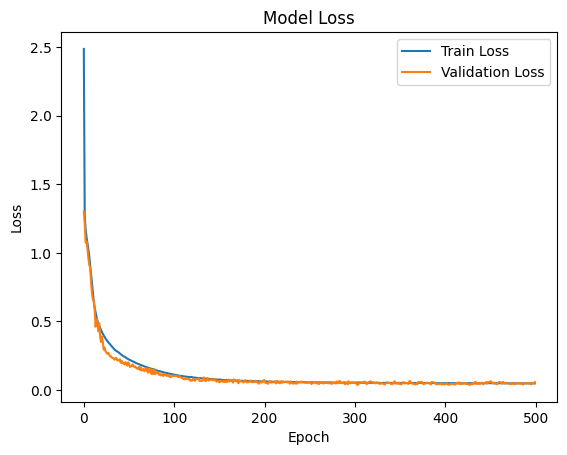

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model - MSE: 0.002928352929972657, MAE: 0.04533527294917198, RMSE: 0.05411425810239531, R²: 0.9332492684891661
Custom Accuracy (within 10.0% tolerance): 99.90%


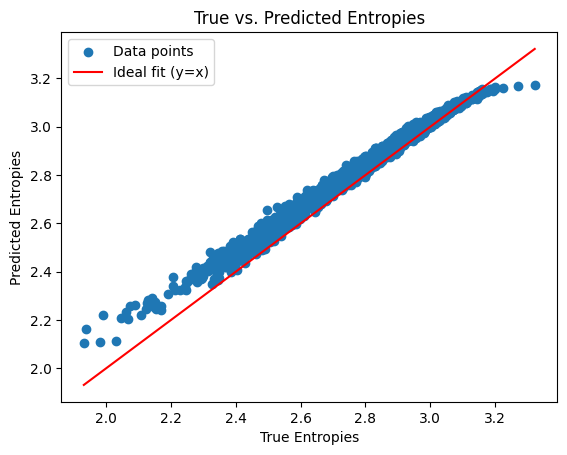

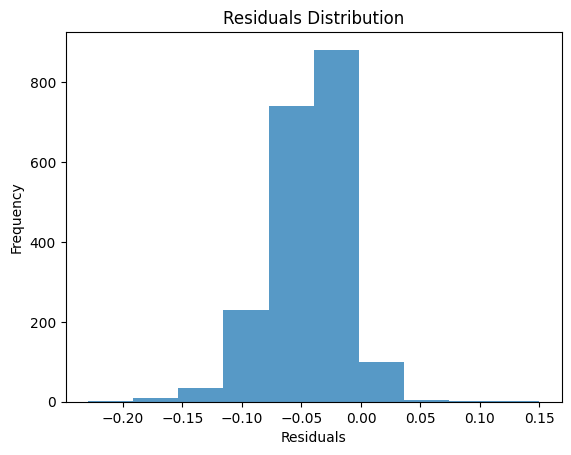

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Number of bins and samples for generating distributions
bins = 10
n_samples = 1000

# Define a diverse set of empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=3, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Triangular': np.histogram(np.random.triangular(left=0.0, mode=0.5, right=1.0, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Calculate Shannon Entropy for each distribution
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities
    return -np.sum(p * np.log2(p))

true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Convert distributions into feature vectors (X) and entropies as targets (y)
X = np.array([distributions[key] for key in distributions])  # Shape: (num_distributions, bins)
y = np.array([true_entropies[key] for key in true_entropies])  # Shape: (num_distributions,)

# Generate additional samples using Dirichlet distributions for more training data
def generate_dirichlet_samples(n_samples, bins):
    return np.random.dirichlet(np.ones(bins), size=n_samples)

# Add Dirichlet-generated distributions to the training set
X_dirichlet = generate_dirichlet_samples(10000, bins)
entropies_dirichlet = np.array([compute_shannon_entropy(x) for x in X_dirichlet])

# Combine empirical and Dirichlet data
X_combined = np.vstack((X, X_dirichlet))
y_combined = np.concatenate((y, entropies_dirichlet))

# Feature scaling with StandardScaler
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y_combined, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(bins,), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)  # Output layer for entropy prediction
])

# Compile the model with MAE as loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mae')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_data=(X_test, y_test))

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R²: {r2}")

# Calculate custom accuracy based on a tolerance (e.g., 10%)
tolerance = 0.1  # 10% tolerance
abs_diff = np.abs(y_test - y_pred.flatten())
relative_diff = abs_diff / np.abs(y_test)
accurate_predictions = np.sum(relative_diff <= tolerance)
accuracy = accurate_predictions / len(y_test) * 100

print(f"Custom Accuracy (within {tolerance * 100}% tolerance): {accuracy:.2f}%")

# Plot True vs. Predicted Entropies
plt.scatter(y_test, y_pred, label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', label='Ideal fit (y=x)')
plt.title('True vs. Predicted Entropies')
plt.xlabel('True Entropies')
plt.ylabel('Predicted Entropies')
plt.legend()
plt.show()

# Residual Analysis
residuals = y_test - y_pred.flatten()
plt.hist(residuals, bins=10, alpha=0.75)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.5923 - val_loss: 1.2483
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3598 - val_loss: 1.2644
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1905 - val_loss: 1.0863
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.1179 - val_loss: 1.0616
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0650 - val_loss: 1.0445
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0201 - val_loss: 0.9748
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9719 - val_loss: 0.9185
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9091 - val_loss: 0.8461
Epoch 9/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8344 - val_loss: 0.7797
Epoch 10/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7627 - val_loss: 0.7275
Epoch 11/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7057 - val_loss: 0.6381
Epoch 12/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6

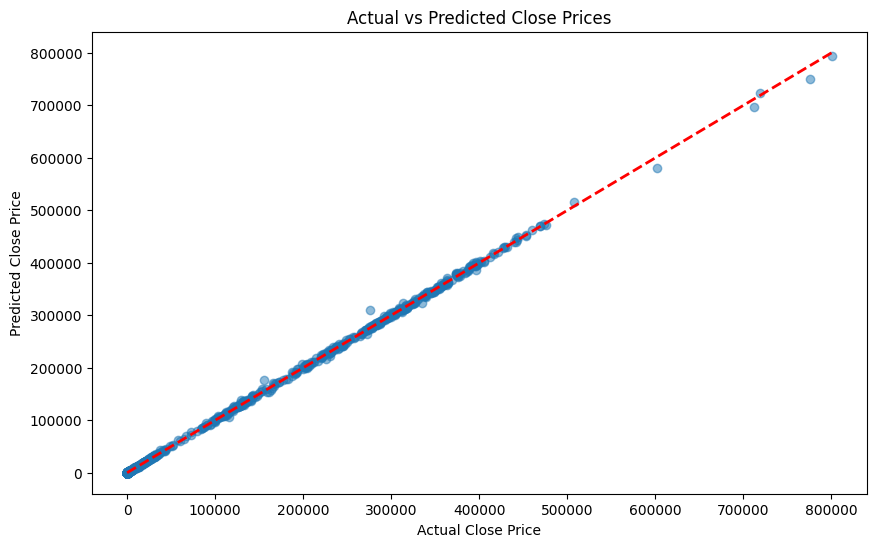

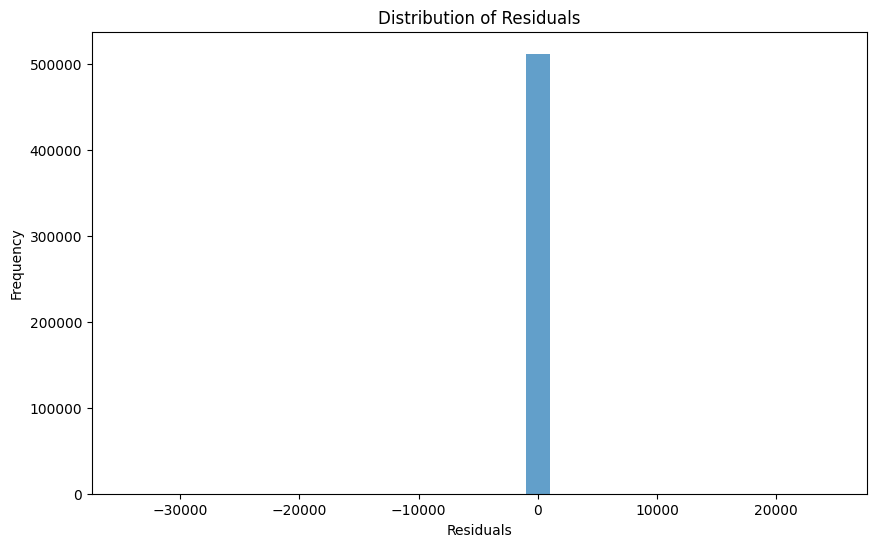

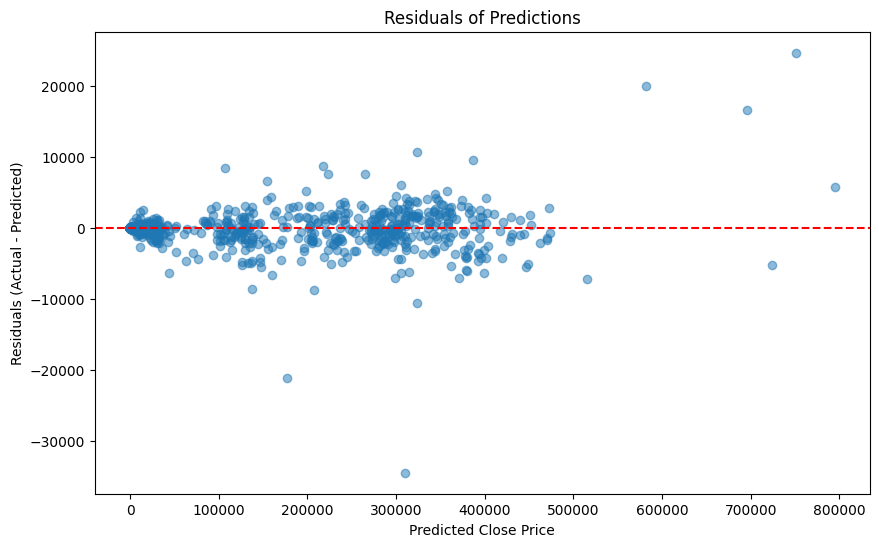

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Initialize Spark Session
spark = SparkSession.builder.appName("StockPricePrediction").getOrCreate()

# Load your data here, for example:
data = spark.read.csv("/content/historical_stock_prices.csv", header=True, inferSchema=True)
# For this example, assume 'data' is a PySpark DataFrame with columns: 'open', 'low', 'high', 'volume', 'close'

# Number of bins and samples for generating distributions
bins = 10
n_samples = 1000

# Define a diverse set of empirical distributions
distributions = {
    'Uniform': np.ones(bins) / bins,
    'Normal': np.histogram(np.random.normal(loc=0.5, scale=0.15, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Exponential': np.histogram(np.random.exponential(scale=0.2, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Bimodal': np.histogram(np.concatenate([np.random.normal(0.25, 0.05, int(n_samples/2)), np.random.normal(0.75, 0.05, int(n_samples/2))]), bins=bins, range=(0, 1), density=True)[0],
    'Lognormal': np.histogram(np.random.lognormal(mean=-1, sigma=0.4, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Beta': np.histogram(np.random.beta(a=0.5, b=0.5, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Gamma': np.histogram(np.random.gamma(shape=2, scale=0.1, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Poisson': np.histogram(np.random.poisson(lam=3, size=n_samples), bins=bins, range=(0, 1), density=True)[0],
    'Triangular': np.histogram(np.random.triangular(left=0.0, mode=0.5, right=1.0, size=n_samples), bins=bins, range=(0, 1), density=True)[0]
}

# Normalize the distributions
for key in distributions:
    distributions[key] /= distributions[key].sum()

# Calculate Shannon Entropy for each distribution
def compute_shannon_entropy(p):
    p = p[p > 0]  # Remove zero probabilities
    return -np.sum(p * np.log2(p))

true_entropies = {key: compute_shannon_entropy(dist) for key, dist in distributions.items()}

# Convert distributions into feature vectors (X) and entropies as targets (y)
X = np.array([distributions[key] for key in distributions])  # Shape: (num_distributions, bins)
y = np.array([true_entropies[key] for key in true_entropies])  # Shape: (num_distributions,)

# Generate additional samples using Dirichlet distributions for more training data
def generate_dirichlet_samples(n_samples, bins):
    return np.random.dirichlet(np.ones(bins), size=n_samples)

# Add Dirichlet-generated distributions to the training set
X_dirichlet = generate_dirichlet_samples(10000, bins)
entropies_dirichlet = np.array([compute_shannon_entropy(x) for x in X_dirichlet])

# Combine empirical and Dirichlet data
X_combined = np.vstack((X, X_dirichlet))
y_combined = np.concatenate((y, entropies_dirichlet))

# Feature scaling with StandardScaler
scaler = StandardScaler()
X_combined_scaled = scaler.fit_transform(X_combined)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined_scaled, y_combined, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(128, input_shape=(bins,), activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)  # Output layer for entropy prediction
])

# Compile the model with MAE as loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mae')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_data=(X_test, y_test))

# Predict entropies for stock price features
predicted_entropies = model.predict(X_test)

# Prepare stock data for PySpark's Linear Regression Model
assembler = VectorAssembler(inputCols=['open', 'low', 'high', 'volume'], outputCol='features')
data_assembled = assembler.transform(data)

# Split the data into training and testing sets
(trainingData, testData) = data_assembled.randomSplit([0.7, 0.3], seed=42)

# Define the PySpark linear regression model
lr = LinearRegression(labelCol="close", featuresCol="features", regParam=0.1)

# Train the linear regression model
lr_model = lr.fit(trainingData)

# Test the model on test data
predictions = lr_model.transform(testData)

# Evaluate the model's performance
predictions.select("prediction", "close", "features").show()

import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming 'predictions' is the DataFrame with prediction and actual values
# Convert Spark DataFrame to Pandas DataFrame for visualization
preds_pd = predictions.select("prediction", "close").toPandas()

# Calculate additional metrics
evaluator = RegressionEvaluator(labelCol="close", predictionCol="prediction")
mae = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Plot Prediction vs. Actual
plt.figure(figsize=(10, 6))
plt.scatter(preds_pd["close"], preds_pd["prediction"], alpha=0.5)
plt.plot([preds_pd["close"].min(), preds_pd["close"].max()],
         [preds_pd["close"].min(), preds_pd["close"].max()], 'r--', lw=2)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Prices")
plt.show()

# Plot residuals
residuals = preds_pd["close"] - preds_pd["prediction"]
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Residuals Plot
plt.figure(figsize=(10, 6))
plt.scatter(preds_pd["prediction"], residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Close Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals of Predictions")
plt.show()